In [40]:
import pandas as pd

# Load the AAPL data
df = pd.read_csv("../data/yfinance_data/AAPL_historical_data.csv")

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date
df = df.sort_values('Date')

# Set Date as index (optional but useful for plotting and analysis)
df.set_index('Date', inplace=True)

# Display the head
df.head()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [41]:
import ta

df['SMA_20'] = ta.trend.sma_indicator(df['Close'], window=20)
df['EMA_20'] = ta.trend.ema_indicator(df['Close'], window=20)
df['RSI_14'] = ta.momentum.rsi(df['Close'], window=14)

macd = ta.trend.MACD(df['Close'])
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()
df['MACD_hist'] = macd.macd_diff()

bb = ta.volatility.BollingerBands(df['Close'])
df['BB_upper'] = bb.bollinger_hband()
df['BB_middle'] = bb.bollinger_mavg()
df['BB_lower'] = bb.bollinger_lband()


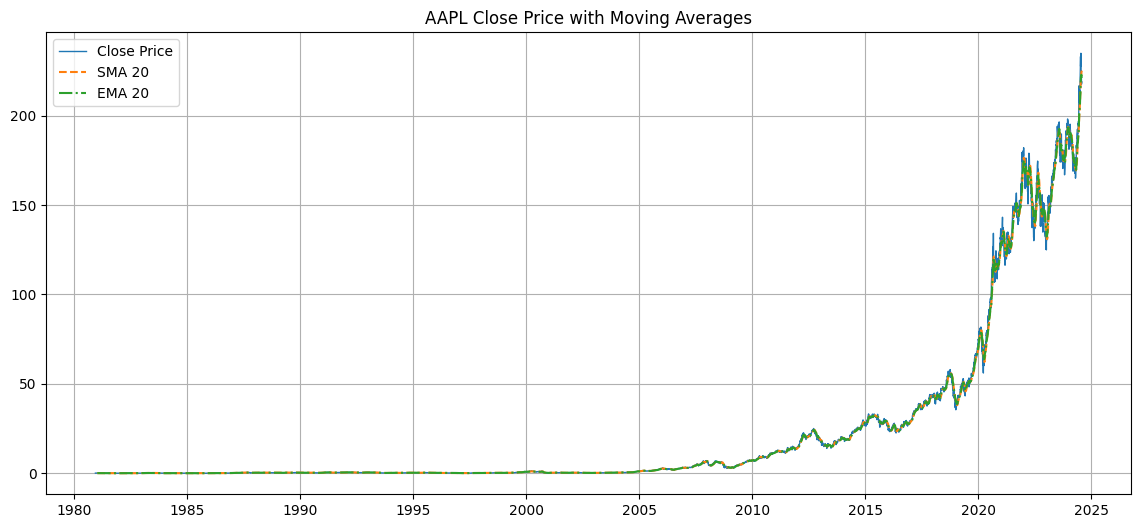

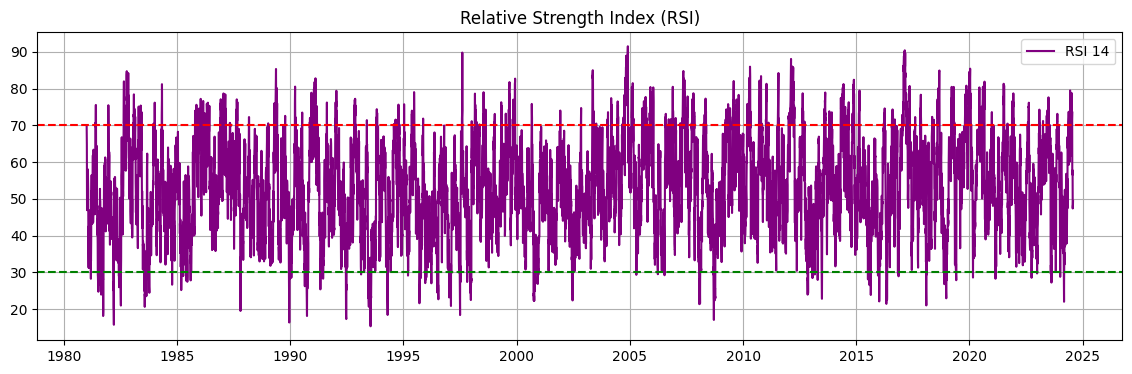

c:\Users\hp\Desktop\financial-news-sentiment-analysis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


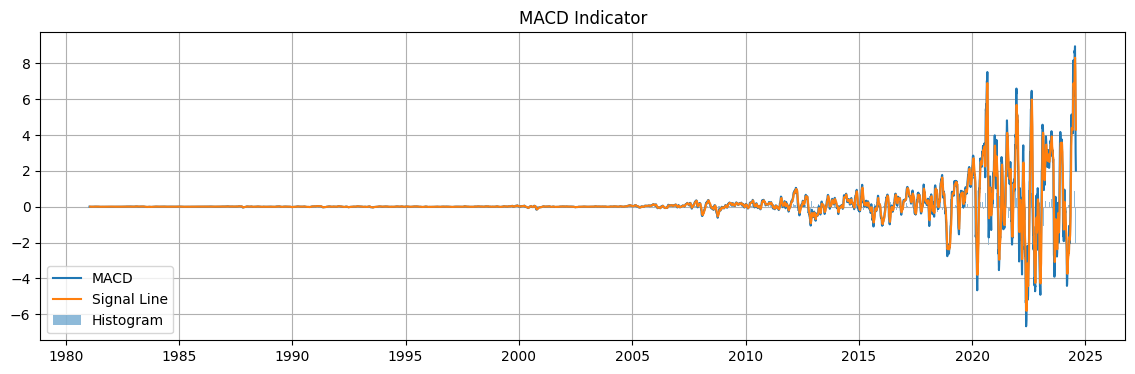

In [42]:
import matplotlib.pyplot as plt

# Plot Close Price with SMA and EMA
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', linewidth=1)
plt.plot(df['SMA_20'], label='SMA 20', linestyle='--')
plt.plot(df['EMA_20'], label='EMA 20', linestyle='-.')
plt.title('AAPL Close Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

# Plot RSI
plt.figure(figsize=(14, 4))
plt.plot(df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.grid(True)
plt.show()

# MACD
plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD')
plt.plot(df['MACD_signal'], label='Signal Line')
plt.bar(df.index, df['MACD_hist'], label='Histogram', alpha=0.5)
plt.title('MACD Indicator')
plt.legend()
plt.grid(True)
plt.show()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.470619  129.226060  122.582127  128.613993  112117500
2023-01-04  124.744110  127.014701  123.480480  125.267331   89113600
2023-01-05  123.421257  126.136090  123.164587  125.504275   80962700
2023-01-06  127.962425  128.623856  123.292916  124.398597   87754700
2023-01-09  128.485657  131.703978  128.228987  128.801572   70790800


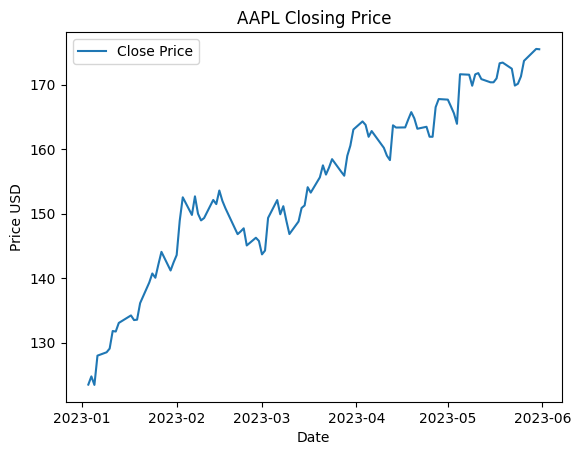

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for Apple (AAPL)
ticker = "AAPL"
data = yf.download(ticker, start="2023-01-01", end="2023-06-01")

print(data.head())  # See first few rows

# Plot the closing price
plt.plot(data.index, data['Close'], label="Close Price")
plt.title(f"{ticker} Closing Price")
plt.xlabel("Date")
plt.ylabel("Price USD")
plt.legend()
plt.show()
